In [2]:
import pandas

In [3]:
df = pandas.read_parquet("/home/lmorales/work/pipelines/surname_data_pipeline/_products/clean/surnames_2015.parquet")


In [4]:
df.head()

,family_name,surname,gender,province_id,department_id,circuit_id
0,ACOSTA,ACOSTA,F,02,02091,139
1,AGUERREA,AGUERREA,M,02,02091,139
2,ANELLO,ANELLO,F,02,02091,139
3,ARAKAKI,ARAKAKI,M,02,02091,139
4,ARRESE,ARRESE,M,02,02091,139


In [5]:
from surnames_package import utils

In [6]:
df = utils.append_cell_description(df, departmentCodeColumn="department_id")

In [7]:
df.head()

,family_name,surname,gender,province_id,department_id,circuit_id,departamento_nombre,provincia_nombre,region_nombre,region_id
0,ACOSTA,ACOSTA,F,02,02091,139,Comuna 13,Ciudad Autónoma de Buenos Aires,Centro,03
1,AGUERREA,AGUERREA,M,02,02091,139,Comuna 13,Ciudad Autónoma de Buenos Aires,Centro,03
2,ANELLO,ANELLO,F,02,02091,139,Comuna 13,Ciudad Autónoma de Buenos Aires,Centro,03
3,ARAKAKI,ARAKAKI,M,02,02091,139,Comuna 13,Ciudad Autónoma de Buenos Aires,Centro,03
4,ARRESE,ARRESE,M,02,02091,139,Comuna 13,Ciudad Autónoma de Buenos Aires,Centro,03


In [8]:
import math

import matplotlib.pyplot as plt

In [33]:
region_surnames_df = df[df['region_nombre'] == "Patagonia"]

In [34]:
region_surnames_df.head()

,family_name,surname,gender,province_id,department_id,circuit_id,departamento_nombre,provincia_nombre,region_nombre,region_id
18430324,ABAL,ABAL,M,26,26077,1,Rawson,Chubut,Patagonia,05
18430325,ACOSTA,ACOSTA,M,26,26077,1,Rawson,Chubut,Patagonia,05
18430326,AGUAYO,AGUAYO,M,26,26077,1,Rawson,Chubut,Patagonia,05
18430327,ALEGRE,ALEGRE,F,26,26077,1,Rawson,Chubut,Patagonia,05
18430328,ALMENDRA,ALMENDRA,M,26,26077,1,Rawson,Chubut,Patagonia,05


In [35]:
surname_counts = region_surnames_df['surname'].value_counts()

In [36]:
print(surname_counts.head())

GONZALEZ     22820
RODRIGUEZ    16551
MARTINEZ     14431
DIAZ         14249
FERNANDEZ    13637
Name: surname, dtype: int64


In [37]:
occurrences_df = surname_counts.reset_index().rename(columns={'index': 'surname', 'surname': 'occurrences'})

In [39]:
print("occurrences_df.head()")
print()
print(occurrences_df.head())

occurrences_df.head()

     surname  occurrences
0   GONZALEZ        22820
1  RODRIGUEZ        16551
2   MARTINEZ        14431
3       DIAZ        14249
4  FERNANDEZ        13637


In [40]:
freq_ocurrences_df = \
    occurrences_df['occurrences']\
        .value_counts()\
        .reset_index()\
        .rename(columns={
            'index': 'occurrences',
            'occurrences': 'frecuency'
        })

In [41]:
print("freq_ocurrences_df.head(3)")
print(freq_ocurrences_df.head(3))

freq_ocurrences_df.head(3)
   occurrences  frecuency
0            1      26830
1            2       9843
2            3       6705


In [42]:
freq_ocurrences_df['frecuency_log'] = freq_ocurrences_df['frecuency'].apply(math.log)
freq_ocurrences_df['occurrences_log'] = freq_ocurrences_df['occurrences'].apply(math.log)

In [43]:
print("freq_ocurrences_df.head(3)")
print(freq_ocurrences_df.head(3))

freq_ocurrences_df.head(3)
   occurrences  frecuency  frecuency_log  occurrences_log
0            1      26830      10.197276         0.000000
1            2       9843       9.194516         0.693147
2            3       6705       8.810609         1.098612


In [31]:
def plot_log_log(ocurrences_log, frecuency_log, regionName, ax=None):
    
    if not ax:
        f, ax = plt.subplots(
            nrows=1, ncols=1,
            figsize=(8, 8),
            constrained_layout=True
        )

    ax.scatter(
        ocurrences_log,
        frecuency_log,
        alpha=.25,
    )
    
    ax.annotate(f"{regionName}", (1, 1), fontsize=18)
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xlabel("Ocurrencies")
    ax.set_ylabel("Freq")
    
    return ax

Text(1, 0.5, 'n = 1,635,969')

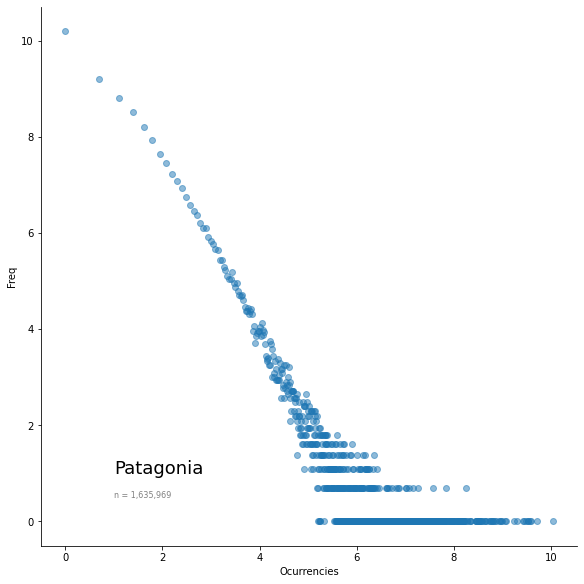

In [20]:
ax = plot_log_log(freq_ocurrences_df['occurrences_log'], freq_ocurrences_df['frecuency_log'], "Patagonia")

ax.annotate(f"n = {len(region_surnames_df):,}", (1, 0.5), fontsize=8, color="grey")

_Abajo a la derecha están los que tienen menos portadores_

In [45]:
def get_frequency_ocurrency(surnamesSerie):
    """
    Retorna el dataset de ocurrencia-frecuencia según los apellidos recibidos.
    
    Returns:
        pandas.Dataframe: columnas:
            occurrences  frecuency  frecuency_log  occurrences_log
    """
    
    surname_counts = surnamesSerie.value_counts()

    occurrences_df = \
        surname_counts\
            .reset_index()\
            .rename(columns={
                'index': 'surname',
                'surname': 'occurrences'
            })
    
    # occurrences_df.head(3)
    #      surname  occurrences
    # 0   GONZALEZ        22820
    # 1  RODRIGUEZ        16551
    # 2   MARTINEZ        14431

    occurrences_freq_df = \
        occurrences_df['occurrences']\
            .value_counts()\
            .reset_index()\
            .rename(columns={
                'index': 'occurrences',
                'occurrences': 'frecuency'
            })

    # occurrences_freq_df.head(3)
    #    occurrences  frecuency
    # 0            1      26830
    # 1            2       9843
    # 2            3       6705
    
    occurrences_freq_df['frecuency_log'] = \
        occurrences_freq_df['frecuency'].apply(math.log)
    occurrences_freq_df['occurrences_log'] = \
        occurrences_freq_df['occurrences'].apply(math.log)
    
    # freq_ocurrences_df.head(3)
    #    occurrences  frecuency  frecuency_log  occurrences_log
    # 0            1      26830      10.197276         0.000000
    # 1            2       9843       9.194516         0.693147
    # 2            3       6705       8.810609         1.098612
    
    return occurrences_freq_df

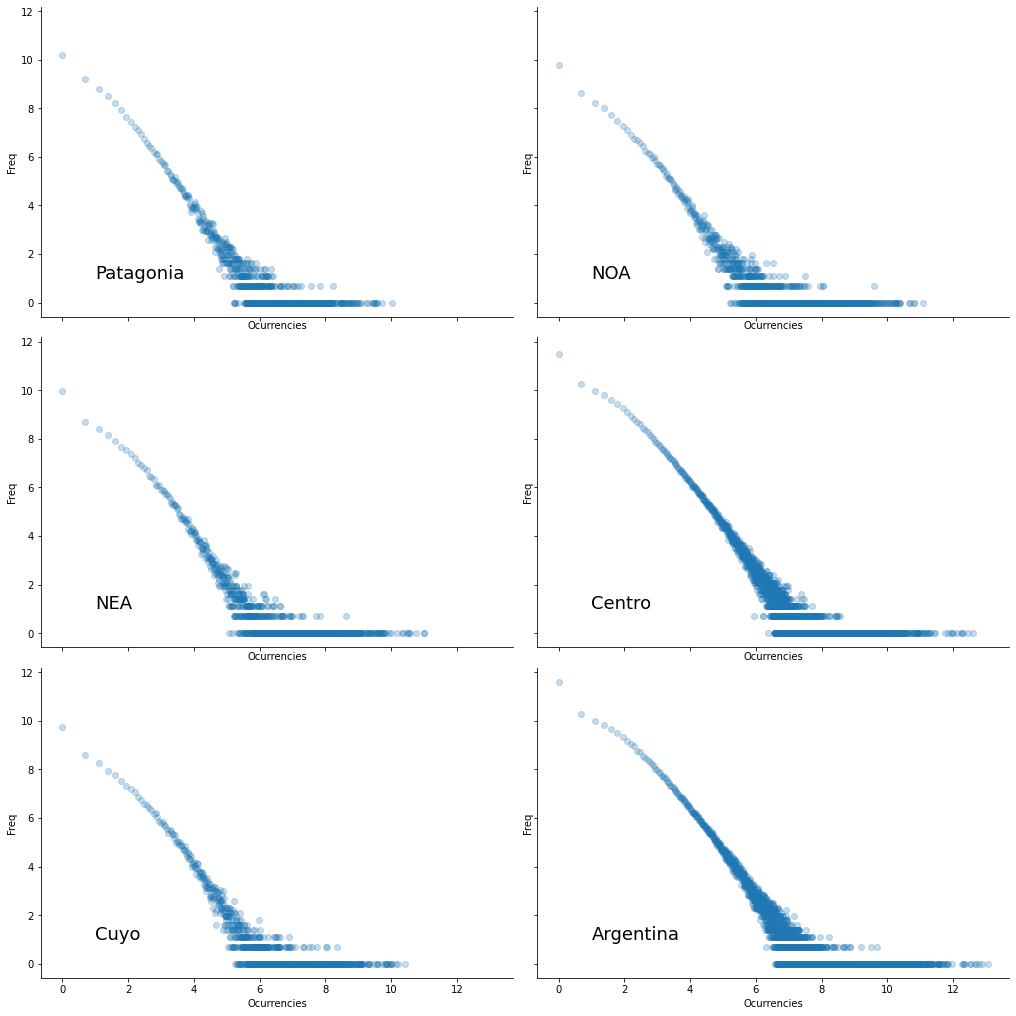

In [46]:
regiones = ["Patagonia", "NOA", "NEA", "Centro", "Cuyo", "Argentina"]

f, axs = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(14, 14),
    sharex=True,
    sharey=True,
    constrained_layout=True)

axes = axs.flatten()

for regionName, ax in zip(regiones, axes):
    
    if regionName == "Argentina":
        region_surnames_df = df
    else:
        region_surnames_df = df[df['region_nombre'] == regionName]
        region_surnames_df = region_surnames_df.reset_index(drop=True)

    freq_ocurr_df = get_frequency_ocurrency(region_surnames_df['surname'])
    
    plot_log_log(
        freq_ocurr_df['occurrences_log'],
        freq_ocurr_df['frecuency_log'],
        regionName,
        ax)


    

In [49]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [70]:
patagonia_df = df[df['region_nombre'] == "Patagonia"]

occur_freq_patagonia = get_frequency_ocurrency(patagonia_df['surname'])

print(occur_freq_patagonia.head())

   occurrences  frecuency  frecuency_log  occurrences_log
0            1      26830      10.197276         0.000000
1            2       9843       9.194516         0.693147
2            3       6705       8.810609         1.098612
3            4       4969       8.510974         1.386294
4            5       3688       8.212840         1.609438


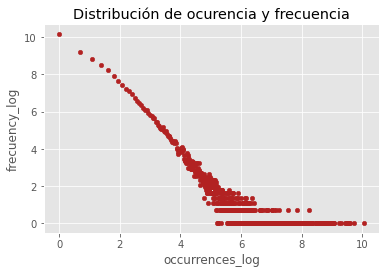

In [54]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

occur_freq_patagonia.plot(
    x    = 'occurrences_log',
    y    = 'frecuency_log',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de ocurencia y frecuencia');

In [63]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(
    x = occur_freq_patagonia['occurrences_log'],
    y =  occur_freq_patagonia['frecuency_log']
)

print("Coeficiente de correlación de Pearson: ", corr_test[0])
print(f"P-value: {corr_test[1]:.100f}")

Coeficiente de correlación de Pearson:  -0.8369686888719089
P-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [64]:
# División de los datos en train y test
# ==============================================================================
X = occur_freq_patagonia[['occurrences_log']]
y = occur_freq_patagonia['frecuency_log']

X_train, X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size   = 0.8,
    random_state = 1234,
    shuffle      = True
)

In [65]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
# modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

In [66]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1587.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          1.31e-177
Time:                        12:59:10   Log-Likelihood:                -860.93
No. Observations:                 661   AIC:                             1726.
Df Residuals:                     659   BIC:                             1735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8965      0.153     45.210      0.0

In [67]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[ 6.5969763 ,  7.19603114],
       [-1.0106623 , -0.9157037 ]])

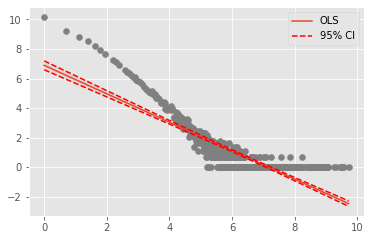

In [68]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [69]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.8181084330113131


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4041.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:05:05   Log-Likelihood:                -2675.9
No. Observations:                1927   AIC:                             5356.
Df Residuals:                    1925   BIC:                             5367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8874      0.109     72.544      0.0

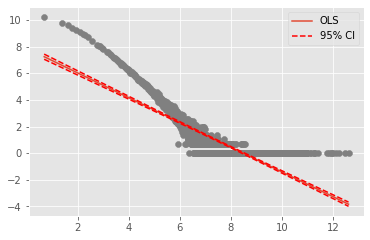

In [71]:
region_df = df[df['region_nombre'] == "Centro"]

occur_freq_in_region = get_frequency_ocurrency(region_df['surname'])


# División de los datos en train y test
# ==============================================================================
X = occur_freq_in_region[['occurrences_log']]
y = occur_freq_in_region['frecuency_log']

X_train, X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size   = 0.8,
    random_state = 1234,
    shuffle      = True
)

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
print("Intervalos de confianza para los coeficientes del modelo:")
print(modelo.conf_int(alpha=0.05))


# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1481.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):          1.06e-193
Time:                        13:05:26   Log-Likelihood:                -1212.4
No. Observations:                 920   AIC:                             2429.
Df Residuals:                     918   BIC:                             2438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4762      0.126     43.553      0.0

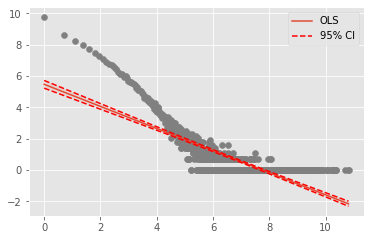

In [72]:
region_df = df[df['region_nombre'] == "NOA"]

occur_freq_in_region = get_frequency_ocurrency(region_df['surname'])


# División de los datos en train y test
# ==============================================================================
X = occur_freq_in_region[['occurrences_log']]
y = occur_freq_in_region['frecuency_log']

X_train, X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size   = 0.8,
    random_state = 1234,
    shuffle      = True
)

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
print("Intervalos de confianza para los coeficientes del modelo:")
print(modelo.conf_int(alpha=0.05))


# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();